In [1]:
import wdlen
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import slope
from new_childes import CHILDESCorpusReader

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Dutch/')
Groningen = CHILDESCorpusReader(corpus_root, 'Groningen/.*.xml')
#wdlen = wordlenth(Davis)

In [3]:
illegal = [ ['ʔm', 'ubə', 'upə', 'u']]

In [8]:
check = wdlen.print_u(Groningen, illegal, 23)

21 ['oei', 'pak', 'ə']
22 ['ook', 'dietie', 'koeke']
18 ['goes', 'Jisk', 'aj']
18 ['ei', 'i', 'eit']
20 ['kusje', 'geven', 'aan', 'Jiska']
21 ['presses', 'keys', 'piano']
21 ['mama', 'ma', 'lig']
21 ['liggen', 'mu', 'Peter']
22 ['ook', 'koek', 'ə']
22 ['Peter', 'koffie', 'op', 'taf', 'zette']
22 ['ook', 'koffie', 'ə']
22 ['bal', 'ook', 'ə']
22 ['bal', 'ook', 'ə']
22 ['tafel', 'ook', 'ə']
22 ['ook', 'koffie', 'ə']
22 ['ook', 'borstel', 'ə']
22 ['stoel', 'Peter', 'p']
22 ['op', 'stoel', 'ə']
22 ['mama', 'open', 'ook']
22 ['ook', 'deur', 'ə']
22 ['ook', 'ə', 'stoel', 'om']
22 ['ook', 'stoel', 'ə']
22 ['ook', 'aut', 'ə']
22 ['ook', 'stoel', 'uit']
22 ['op', 'stoel', 'ə']
22 ['', 'ook', 'daar']
22 ['', 'ook', 'daar']
22 ['', 'in', 'Peter']
22 ['mama', 'schoenen', 'uit']
22 ['mama', 'schoenen', 'uit']
22 ['mama', 'schoenen', 'uit']
22 ['ook', 'deur', 'aan']
22 ['bal', 'ook', 'ə']
22 ['bal', 'ook', 'ə']
22 ['bal', 'ook', 'ə']
22 ['pak', 'hem', 'Peter']
22 ['bal', 'ook', 'ə']
22 ['bal', 'ook',

In [4]:
wdlen_list = wdlen.wdlen_nc(Groningen, illegal)

overall: 100%|██████████| 207/207 [00:19<00:00, 10.47it/s]


In [5]:
wdlen_five = wdlen.wdlen_five(Groningen, illegal)

overall: 100%|██████████| 207/207 [00:20<00:00, 10.03it/s]


In [7]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

In [24]:
df = pd.DataFrame(wdlen_five).dropna()
df = df[['fname', 'age', 'five', 'six']]

In [8]:
writer = pd.ExcelWriter('Groningen.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [25]:
writer = pd.ExcelWriter('Groningen_five.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

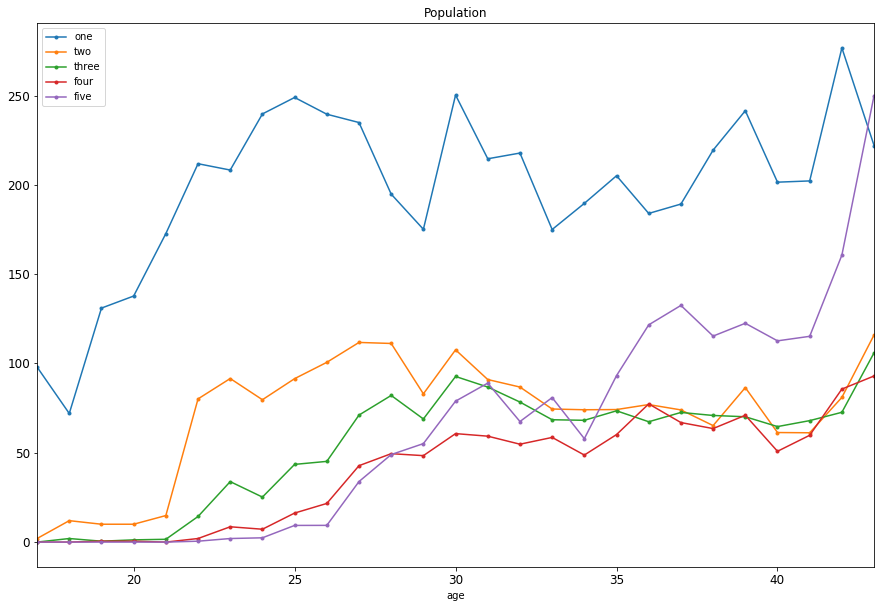

In [6]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population',  style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [7]:
df1_com = df.groupby('age').count()

In [27]:
df_age = pd.read_excel('Groningen.xlsx')

In [12]:
df2_com = df_age.groupby('age.1').count()

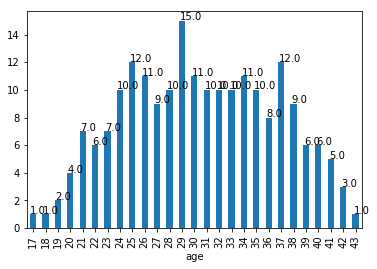

In [10]:
# Before coelescing ages
ax = df1_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

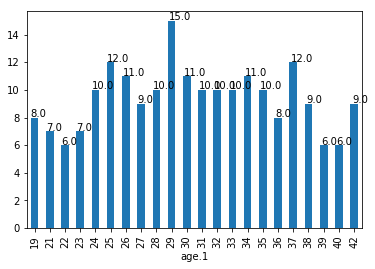

In [13]:
# After coelescing ages
ax = df2_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [28]:
df_age = df_age.drop('age', axis = 1)

### two to five

In [14]:
df_ageno1 = df_age.drop('one', axis = 1)

In [15]:
df_ageno1['sum'] = df_ageno1.loc[:, 'two':'five'].sum(axis = 1)

In [16]:
df_perage = df_ageno1
df_perage.loc[:, 'two':'five'] = df_ageno1.loc[:, 'two':'five'].div(df_ageno1['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

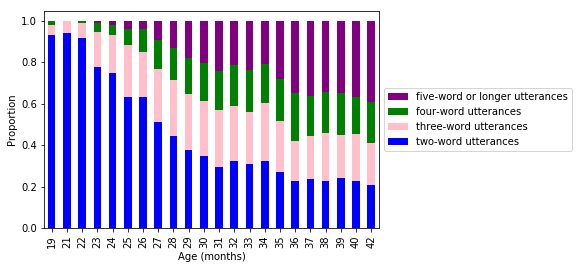

In [36]:
ax = df_perage.groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'blue', 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'two-word utterances', 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

### three to five

In [19]:
df_ageno2 = df_age.drop(['one','two'], axis = 1)
df_ageno2['sum'] = df_ageno2.loc[:, 'three':'five'].sum(axis = 1)
df_perage = df_ageno2
df_perage.loc[:, 'three':'five'] = df_ageno2.loc[:, 'three':'five'].div(df_ageno2['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

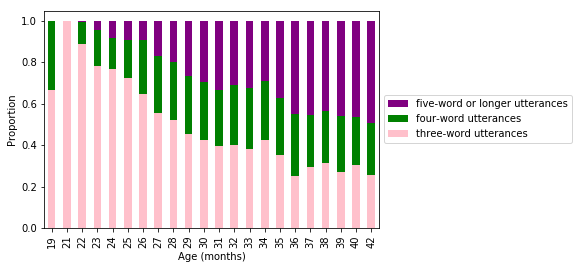

In [20]:
# three-word utterances are too few in 19 and 21 months
ax = df_perage.dropna().groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

### four to five

In [29]:
df_ageno3 = df_age.drop(['one','two', 'three'], axis = 1)
df_ageno3['sum'] = df_ageno3.loc[:, 'four':'five'].sum(axis = 1)
df_perage = df_ageno3
df_perage.loc[:, 'four':'five'] = df_ageno3.loc[:, 'four':'five'].div(df_ageno3['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

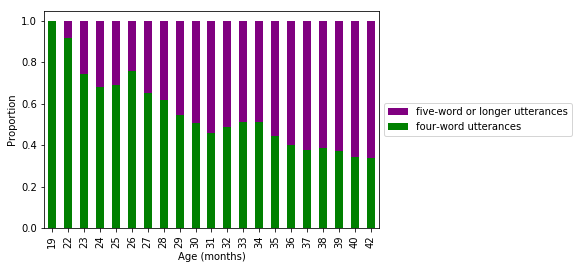

In [30]:
ax = df_perage.dropna().groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

## five

In [22]:
df_age = pd.read_excel('Groningen_five.xlsx')

In [23]:
df_ageno4 = df_age.drop('age', axis = 1)
df_ageno4['sum'] = df_ageno4.loc[:, 'five':'six'].sum(axis = 1)
df_perage = df_ageno4
df_perage.loc[:, 'five':'six'] = df_ageno4.loc[:, 'five':'six'].div(df_ageno4['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

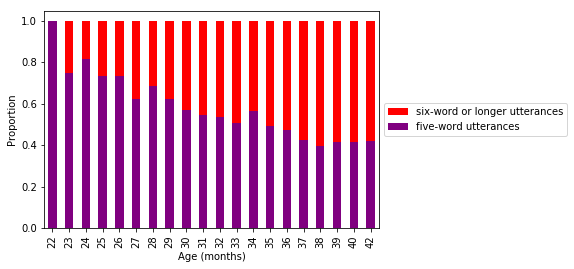

In [24]:
ax = df_perage.dropna().groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'purple', 'red'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'five-word utterances', 'six-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

## Segmented regression

### two to five

In [15]:
df_mean = df_perage.groupby('age.1').mean()

point:  [19.        30.2907479 42.       ]
F1:  197.07904886097512 F2:  26.52833912373664
F seg linear:  [55.13180045]


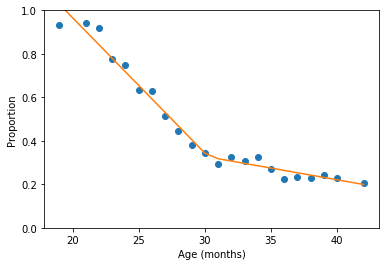

In [17]:
slope.seg_reg(df_perage.groupby('age.1').mean(), 2, 'two') # F(2, 20)=55.132 p<.001

### three to five

point:  [19.         31.07193855 42.        ]
F1:  25.03093379241583 F2:  14.254252018576569
F seg linear:  [3.18166068]


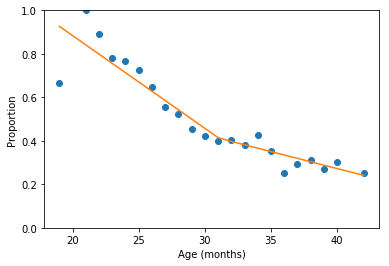

In [21]:
slope.seg_reg(df_perage.dropna().groupby('age.1').mean(), 2, 'three') # F(2, 20)=3.18, p = .063123

### four to five

point:  [19.        29.8349721 42.       ]
F1:  41.507776346633825 F2:  43.54901307803397
F seg linear:  [9.78132094]


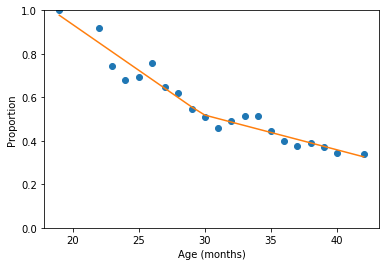

In [31]:
slope.seg_reg(df_perage.dropna().groupby('age.1').mean(), 2, 'four') #F(2, 20) = 9.78  p = .00109

### five 

In [26]:
#may also be poorly conditioned because of the empty data

point:  [22.         22.54775809 42.        ]


D:\academy\two_word_stage\codes\slope.py:233: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)


F1:  -1.0 F2:  172.10542717913967
F seg linear:  [11.1279235]


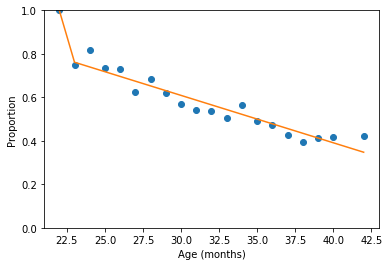

In [25]:
slope.seg_reg(df_perage.dropna().groupby('age.1').mean(), 2, 'five') # can't fit

## plot per child

In [40]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### Without one-word utterances but with the adjustment on ages

In [37]:
df_perage['corpus'] = df_perage.fname.str[0:-10]

In [38]:
children = df_perage.corpus.unique()

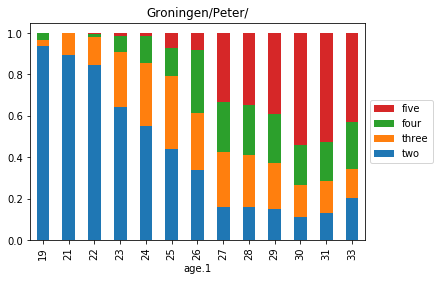

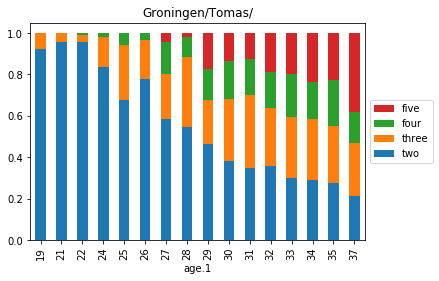

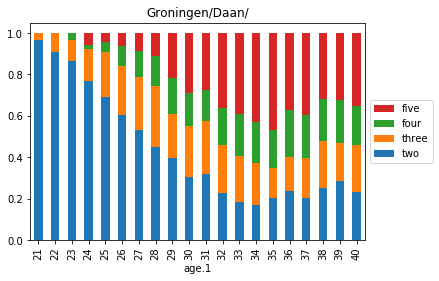

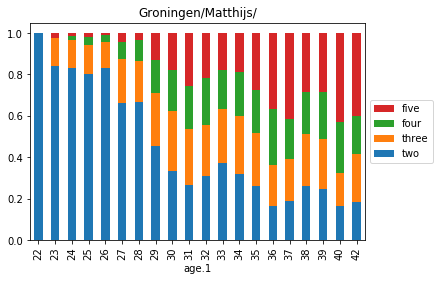

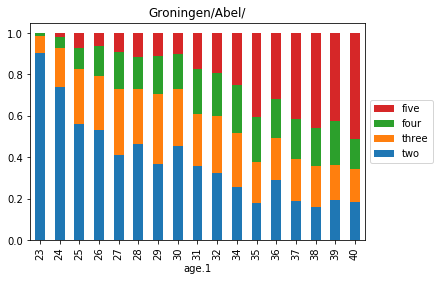

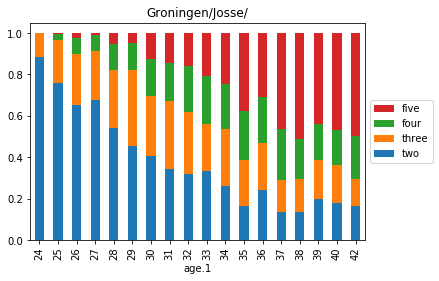

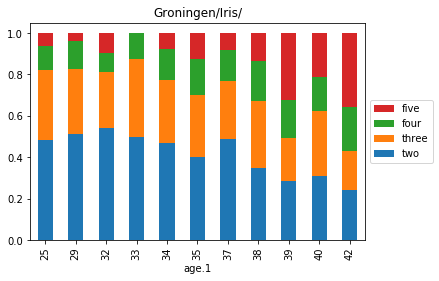

In [41]:
for child in children:
    per_child(df_perage, child, 'age.1')

point:  [19.         28.30987143 33.        ]
F1:  154.0048452484395 F2:  2.023094324740011
F seg linear:  [19.33679529]


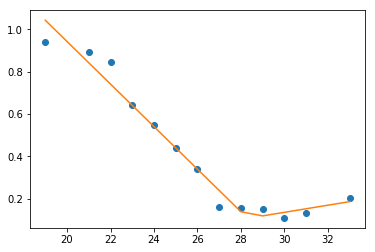

point:  [19.        31.1708745 37.       ]
F1:  91.63997826877448 F2:  49.45038627968484
F seg linear:  [2.49914602]


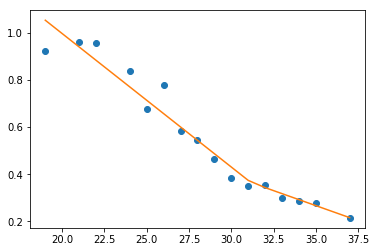

point:  [21.         32.43879765 40.        ]
F1:  889.3940565978957 F2:  10.259595727661107
F seg linear:  [171.43193443]


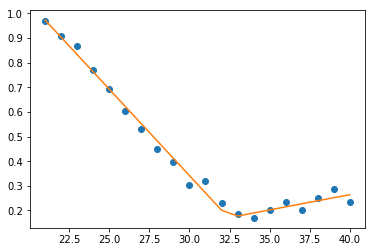

point:  [22. 31. 42.]
F1:  78.44941909289503 F2:  8.562160073867947
F seg linear:  [18.58039019]


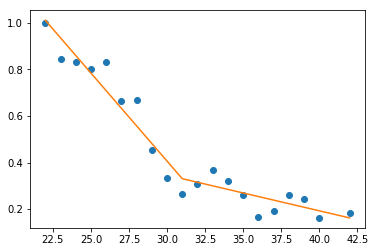

point:  [23.         25.35803684 40.        ]
F1:  929.0704625345553 F2:  75.8810870790109
F seg linear:  [22.64425233]


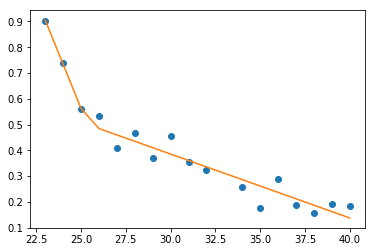

point:  [24.         31.38055539 42.        ]
F1:  209.76546307351438 F2:  9.98268416876134
F seg linear:  [26.14293197]


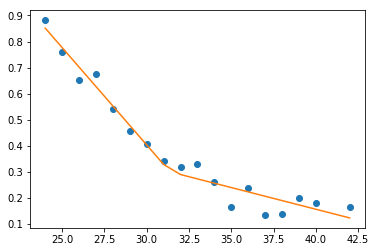

point:  [25.         31.99039246 42.        ]


D:\academy\two_word_stage\codes\slope.py:371: RuntimeWarning: divide by zero encountered in double_scalars
  F1 = (ss1_mod / 1) / (ss1_res / (len(xHat1) - 2))


F1:  0.0 F2:  38.22562031670982
F seg linear:  [6.01637185]


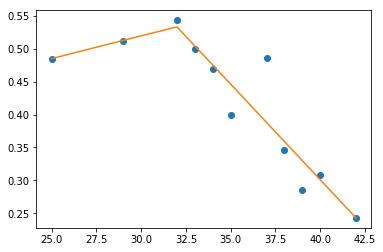

In [43]:
for child in children:
    slope.seg_reg_child(df_perage, child, 2, 'two')

# Analyze slope difference

## Overall slope difference(after adjusting ages)

In [24]:
df_mean = df_perage.groupby('age.1').mean()

In [28]:
slope.max_slope(df_mean)

{30}

In [29]:
slope.calculate_slope(df_mean)

{22: 0.0079041309582096597,
 23: 0.010278550330323877,
 24: 0.018919335692663755,
 25: 0.030492870463257511,
 26: 0.035543310764667088,
 27: 0.042059509766069134,
 28: 0.046404645717991744,
 29: 0.04893423382470885,
 30: 0.049132549178769476,
 31: 0.047249948357661012,
 32: 0.044958186173543448,
 33: 0.041942747746141137,
 34: 0.042737874758615485,
 35: 0.042972546136567757,
 36: 0.039799586338963508,
 37: 0.036517294196986183,
 38: 0.027458872640391305}

## slope difference for each child(after adjusting ages)

In [30]:
for child in children:
    print(child, slope.max_slope_child(df_perage,child))

Groningen/Peter/ {29}
Groningen/Tomas/ {32}
Groningen/Daan/ {32}
Groningen/Matthijs/ {24}
Groningen/Abel/ {25}
Groningen/Josse/ {26}
Groningen/Iris/ {35}


# Plot adult

In [4]:
wdlen_mother = wdlen.wdlen_mother_gro(Groningen, illegal)

overall: 100%|██████████| 207/207 [00:22<00:00,  9.44it/s]


In [5]:
df_mother = pd.DataFrame(wdlen_mother).dropna()
df_mother = df_mother[['fname', 'age', 'one','two','three', 'four', 'five']]

In [7]:
df_mother['sum'] = df_mother.loc[:, 'one':'five'].sum(axis = 1)

In [8]:
df_motherper = df_mother
df_motherper.loc[:, 'one':'five'] = df_mother.loc[:, 'one':'five'].div(df_mother['sum'], axis = 0)

In [9]:
df_motherper = df_motherper.drop('sum', axis = 1)

In [10]:
writer = pd.ExcelWriter('Groningen_mother.xlsx')
df_motherper.to_excel(writer,'Sheet1')
writer.save()

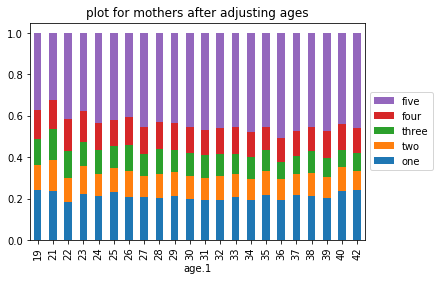

In [12]:
df_mother = pd.read_excel('Groningen_mother.xlsx')
df_motherper = df_mother.drop('age', axis = 1)
ax = df_motherper.groupby('age.1').mean().plot.bar(stacked = True, legend = True, title = 'plot for mothers after adjusting ages')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [6]:
wdlen.print_u(Davis, 3)

23 ['ee', 'kijke', 'hoor']
23 ['e', 'keer', 'zo']
23 ['wach', 'e', 'effe']
23 ['wacht', 'e', 'effe']
23 ['buike', 'buike', 'buike']
23 ['ə', 'poes', 'xxx']
23 ['haren', 'tee', 'haren']
23 ['hiep', 'hiep', 'hoera']
23 ['kijk', 'xxx', 'e']
23 ['kijk', 'e', 'even']
23 ['kijk', 'deze', 'bug']
24 ['ikke', 'koppie', 'thee']
24 ['ikke', 'koppie', 'thee']
24 ['dit', 'dit', 'paard']
24 ['ik', 'ikke', 'zo']
24 ['hier', 'xxx', 'balle']
24 ['ik', 'ikke', 'is']
24 ['kijk', 'kijk', 'e']
24 ['hier', 'hier', 'hier']
24 ['hier', 'hier', 'hier']
24 ['hier', 'toren', 'xxx']
24 ['kijk', 'bomen', 'huizen']
24 ['hier', 'auto', 'xxx']
24 ['kijk', 'e', 'xxx']
24 ['kijk', 'hier', 'zo']
24 ['zo', 'xxx', 'zo']
24 ['in', 'soel', 'zitten']
24 ['ik', 'wil', 'jou']
24 ['ik', 'wil', 'jou']
24 ['ja', 'xxx', 'zo']
24 ['xxx', 'de', 'tijger']
24 ['vijf', 'vier', 'vier']
24 ['vier', 'vijf', 'vier']
24 ['dies', 'dieis', 'gogel']
24 ['kijke', 'ee', 'kijke']
24 ['kwak', 'kwak', 'kwak']
24 ['kak', 'kak', 'kak']
24 ['kau', 'ka

27 ['paardje', 'ook', 'bij']
28 ['niet', 'zin', 'in']
28 ['ik', 'wil', 'af']
28 ['dat', 'ə', 'vlinder']
28 ['ja', 'zo', 'xxx']
28 ['gaat', 'wel', 'open']
28 ['xxx', 'vlinder', 'maken']
28 ['dat', 'is', 'vlinder']
28 ['xxx', 'schaar', 'knippen']
28 ['xxx', 'op', 'nee']
28 ['komt', 'vlinder', 'aan']
28 ['Arjen', 'beetje', 'moe']
28 ['jij', 'ook', 'beetje']
28 ['jij', 'bent', 'ziek']
28 ['kan', 'niet', 'pakken']
28 ['ja', 'xxx', 'brug']
28 ['nee', 'auto', 'xxx']
28 ['auto', 'klaar', 'garage']
28 ['auto', 'klaar', 'gara']
28 ['maar', 'niet', 'xxx']
28 ['jij', 'ook', 'Gerard']
28 ['om', 'niet', 'xxx']
28 ['tunnel', 'kijk', 'tunnel']
28 ['ik', 'een', 'tunnel']
28 ['voor', 'voor', 'mij']
28 ['nee', 'kan', 'niet']
28 ['he', 'heb', 'je']
28 ['deez', 'kan', 'niet']
28 ['die', 'kan', 'niet']
28 ['die', 'kan', 'niet']
28 ['I', 'know', 'xxx']
28 ['moet', 'die', 'daar']
28 ['ik', 'kan', 'niet']
28 ['die', 'kan', 'niet']
28 ['toetoet', 'komt', 'ie']
28 ['ga', 'maken', 'bij']
28 ['deez', 'kan', 'wel']

29 ['op', 'grond', 'zetten']
29 ['xxx', 'zie', 'je']
29 ['ah', 'ah', 'ah']
29 ['waar', 'is', 'het']
29 ['hier', 'voor', 'jou']
29 ['ja', 'hoor', 'Gerard']
29 ['ik', 'kan', 'vangen']
29 ['ik', 'kan', 'goo']
29 ['ik', 'kan', 'Gerard']
29 ['Gerard', 'kan', 'vangen']
29 ['hier', 'xxx', 'jou']
29 ['kon', 'niet', 'bij']
29 ['kon', 'niet', 'bij']
29 ['kon', 'niet', 'bij']
29 ['ik', 'kan', 'niet']
29 ['ik', 'weet', 'ik']
29 ['weet', 'ik', 'Pleplo']
29 ['ik', 'heb', 'je']
29 ['is', 'ə', 'zelfde']
29 ['dit', 'ook', 'groen']
29 ['die', 'bij', 'niet']
29 ['ik', 'weet', 'niet']
29 ['dit', 'ook', 'geel']
29 ['deze', 'wel', 'dezelfde']
29 ['die', 'groen', 'xxx']
29 ['en', 'deze', 'bij']
29 ['ja', 'die', 'geel']
29 ['dit', 'ook', 'geel']
29 ['deze', 'moet', 'hier']
29 ['die', 'kan', 'niet']
29 ['die', 'kan', 'niet']
29 ['ja', 'dacht', 'rood']
29 ['nee', 'xxx', 'bij']
29 ['die', 'ook', 'bij']
29 ['die', 'moet', 'eh']
29 ['kan', 'je', 'grote']
29 ['thee', 'drinken', 'he']
29 ['thee', 'drinken', 'he']
29

32 ['deze', 'moet', 'niet']
32 ['ga', 'maar', 'maken']
32 ['ik', 'kan', 'doorheen']
32 ['kan', 'deze', 'in']
32 ['oh', 'eh', 'ja']
32 ['ik', 'doe', 'xxx']
32 ['dat', 'is', 'eh']
32 ['ik', 'bedoel', 'deze']
32 ['deze', 'bedoel', 'ik']
32 ['dat', 'mag', 'xxx']
32 ['kun', 'je', 'kijken']
32 ['xxx', 'kan', 'kijken']
32 ['is', 'in', 'xxx']
32 ['wat', 'heb', 'jij']
32 ['die', 'moet', 'daar']
32 ['tappe', 'tappe', 'ta']
32 ['xxx', 'doet', 'daar']
32 ['ja', 'xxx', 'beuren']
32 ['zo', 'kan', 'je']
32 ['lijken', 'twee', 'ogen']
32 ['de', 'beesten', 'eruit']
32 ['hier', 'voor', 'jou']
32 ['ik', 'ben', 'Arjen']
32 ['kijk', 'e', 'xxx']
32 ['is', 'een', 'xxx']
32 ['hier', 'voor', 'jou']
32 ['zo', 'zo', 'zo']
32 ['dat', 'ie', 'zo']
32 ['ik', 'doe', 'zo']
32 ['ik', 'doe', 'zo']
32 ['xxx', 'niet', 'waar']
32 ['ik', 'wil', 'gras']
32 ['hij', 'wil', 'gras']
32 ['oh', 'au', 'eh']
32 ['wil', 'ook', 'eten']
32 ['deze', 'een', 'koe']
32 ['dit', 'moet', 'koe']
32 ['ja', 'zo', 'beter']
32 ['ja', 'die', 'xxx']


35 ['een', 'paard', 'kan']
35 ['nee', 'een', 'krokodil']
35 ['die', 'zijn', 'xxx']
35 ['wah', 'wah', 'wah']
35 ['oh', 'krokodil', 'gevallen']
35 ['au', 'me', 'oog']
35 ['zo', 'hoofd', 'pijn']
35 ['van', 'andere', 'mannetje']
35 ['tegen', 'de', 'kast']
35 ['dat', 'kan', 'zo']
35 ['ik', 'wil', 'niet']
35 ['zag', 'jij', 'niet']
35 ['op', 'de', 'vliegtuig']
35 ['piloot', 'piloot', 'piloot']
35 ['die', '', '']
35 ['ga', 'jij', 'de']
35 ['hij', 'gaat', 'daar']
35 ['hij', 'valt', 'bijna']
35 ['hij', 'moet', 'xxx']
35 ['zij', 'op', 'xxx']
35 ['heb', 'jij', 'vliegtuig']
35 ['blijf', 'bij', 'mij']
35 ['mij', 'mag', 'xxx']
35 ['stoppen', 'stoppen', 'stoppen']
35 ['oe', 'tegen', 'jou']
35 ['daar', 'komt', 'meneer']
35 ['hoei', 'hoei', 'kijk']
35 ['hij', 'zit', 'erin']
35 ['kijk', 'e', 'hier']
35 ['xxx', 'wil', 'jij']
35 ['zo', 'beter', 'weer']
35 ['xxx', 'trein', 'daar']
35 ['ga', '', 'even']
35 ['gaat', 'ie', 'liggen']
35 ['daar', 'is', 'garage']
35 ['dit', '', 'garage']
35 ['maar', 'ik', 'kan']


37 ['ja', '', 'lukt']
37 ['zo', 'xxx', 'mooi']
37 ['zo', 'rijden', 'oh']
37 ['di', '', 'mijnet']
37 ['mijn', 'is', '']
37 ['kijk', 'zo', 'op']
37 ['die', 'komt', 'nog']
37 ['daar', 'gaat', "he'maal"]
37 ['oh', 'lo', 'lo']
37 ['die', 'kan', 'zo']
37 ['dat', 'moet', 'wel']
37 ['weet', 'ook', 'niet']
37 ['uit', 'de', 'kast']
37 ['gaat', 'die', 'vallen']
37 ['wat', 'is', 'kerstliedjes']
37 ['en', 'een', 'xxx']
37 ['xxx', 'vriendje', 'sneeuwpoppen']
37 ['hij', 'moet', 'zo']
37 ['zo', 'moet', 'dat']
37 ['ja', 'dat', 'hoort']
37 ['die', 'hoort', 'hier']
37 ['ik', 'wil', 'zo']
37 ['doe', 'zo', 'he']
37 ['ja', 'keerd', 'om']
37 ['gaat', 'rijden', 'weer']
37 ['de', 'deur', 'dicht']
37 ['eh', 'naar', 'Artis']
37 ['moet', 'pasoppen', 'he']
37 ['nou', 'ik', 'xxx']
37 ['en', 'nu', 'moeten']
37 ['dat', 'vasthouden', 'hier']
37 ['ja', 'dat', 'xxx']
37 ['', 'is', 'slaaptrein']
37 ['en', 'stukje', 'koffie']
37 ['ja', 'koffie', 'drinken']
37 ['oh', 'wij', 'haha']
38 ['ze', 'zijn', 'plak']
38 ['die', 'pla

40 ['Lies', 'moet', 'zwemmen']
40 ['ok', 'ik', 'xxx']
40 ['oh', 'deze', 'band']
40 ['even', 'zwembroek', 'aan']
40 ['even', 'zwembroek', 'uit']
40 ['ik', 'ben', 'geprongd']
40 ['ik', 'ben', 'geprongd']
40 ['wil', 'je', 'naar']
40 ['riem', 'riem', 'riem']
40 ['we', 'zijn', 'er']
40 ['nog', 'ə', 'een']
40 ['nog', 'ə', 'een']
40 ['nog', 'ə', 'een']
40 ['moet', 'ə', 'aandoen']
40 ['hallo', 'mijn', 'Liesje']
40 ['oh', 'oh', 'oh']
40 ['ik', 'heet', 'Abel']
40 ['de', 'auto', 'vergeten']
40 ['eh', 'ja', 'zo']
40 ['we', 'moeten', 'zwemmen']
40 ['even', 'de', 'plonsen']
40 ['moeten', 'ook', 'erin']
40 ['zullen', 'we', 'uitstappen']
40 ['daar', 'gaan', 'we']
40 ['hier', 'een', 'tijger']
40 ['ja', 'heel', 'zwaar']
21 ['te', 'tie', 'te']
21 ['xxx', 'xxx', 'bot']
21 ['oei', 'ə', 'pak']
22 ['dit', 'dit', 'to']
22 ['dietie', 'ook', 'koeke']
22 ['eh', 'eh', 'ope']
23 ['ujegoesie', 'Peppie', 'eh']
23 ['tie', 'uh', 'ieieie']
23 ['he', 'a', 'gei']
24 ['pamijn', 'pamien', 'babmijn']
24 ['kikke', 'gejn', 'k

27 ['kan', 'eh', 'open']
27 ['kan', 'nie', 'nie']
27 ['eh', 'sinterkaa', 'mama']
27 ['hij', '', 'hier']
27 ['ne', 'ne', 'nee']
27 ['pape', 'Panien', 'patepama']
27 ['Sinterk', 'op', 'paard']
27 ['ke', 'ke', 'kaam']
27 ['Sinterklaas', 'een', '']
27 ['tekuikasa', 'pa', 'paard']
27 ['wat', 'eh', 'ggome']
27 ['eh', 'eh', 'eh']
27 ['piet', 'parte', 'piet']
27 ['dat', 'ə', 'dodootjes']
27 ['kijke', 'ikke', 'kij']
27 ['ha', 'mee', 'sikke']
27 ['ha', 'ha', 'ha']
27 ['xxx', 'nie', 'meer']
27 ['n', 'ke', 'nij']
27 ['moe', 'je', 'xxx']
27 ['deze', 'xxx', 'tekenen']
27 ['eh', 'p', 'pot']
27 ['xxx', 'ə', 'pot']
27 ['no', 'nog', 'pot']
27 ['nog', 'ə', 'pot']
27 ['eh', 'mm', 'ping']
27 ['xxx', 'pen', 'etekend']
27 ['nog', 'ə', 'potood']
27 ['nog', 'eh', 'pot']
27 ['a', 'eh', 'tafel']
27 ['aan', 'eh', 'tafel']
27 ['ich', 'eh', 'af']
27 ['die', 'nie', 'meer']
27 ['nie', 'niet', 'viese']
27 ['niet', 'viese', 'make']
27 ['niet', 'vies', 'maken']
27 ['ehn', 'eh', 'neen']
27 ['ik', 'ook', 'deze']
27 ['kgg'

29 ['papa', 'walvis', 'maken']
29 ['xxx', 'mama', '']
29 ['kap', 'pot', 'maa']
29 ['ga', 'je', 'ook']
29 ['ja', 'dit', 'erbij']
29 ['xxx', 'krei', 'bouwen']
29 ['xxx', 'met', 'Paulien']
29 ['deze', 'kant', 'xxx']
29 ['zo', 'moet', 'ie']
29 ['die', 'alle', 'v']
29 ['deze', 'kan', 'wel']
29 ['die', 'over', 'die']
29 ['die', 'kan', 'niet']
29 ['', 'zie', 'rails']
29 ['', 'kan', 'niet']
29 ['xxx', 'eh', 'deze']
29 ['maar', 'deze', 'moet']
29 ['kijk', 'deze', 'wel']
29 ['zo', 'moet', 'ie']
29 ['waar', 'is', 'ie']
29 ['waar', 'is', 'ie']
29 ['xxx', 'onder', 'rijden']
29 ['op', 'ə', 'rails']
29 ['pas', 'op', 'Pin']
29 ['pas', 'op', 'Pino']
29 ['ja', 'die', 'huisje']
29 ['nog', '', 'huisje']
29 ['misschien', 'deze', 'nog']
29 ['nog', '', 'huisje']
29 ['nog', 'een', 'huisje']
29 ['nog', 'ə', 'been']
29 ['ə', 'kan', 'niet']
29 ['die', 'moet', 'xxx']
29 ['moet', 'deez', 'auto']
29 ['autootje', 'tje', 'rijden']
29 ['de', 'ka', 'wel']
29 ['deze', 'kan', 'wel']
29 ['hee', 'de', 'auto']
29 ['duw', 'j

31 ['is', 'van', 'mijn']
31 ['ne', 'nog', 'keer']
31 ['mag', 'houden', 'deze']
31 ['wa', '', 'dat']
31 ['in', 'de', 'brieve']
31 ['ikke', 'nie', '']
31 ['ja', 'mag', 'wel']
31 ['xxx', 'de', 'televisie']
31 ['n', 'nie', 'vroeg']
31 ['mag', 'ook', 'xxx']
31 ['hee', 'di', '']
31 ['moet', 'hier', 'erop']
31 ['moet', 'hier', 'op']
31 ['waar', 'is', 'ie']
31 ['waar', 'is', 'ie']
31 ['ik', 'zoek', 'deze']
31 ['hee', 'moet', 'de']
31 ['in', 'de', 'kist']
31 ['hij', 'kan', 'wel']
31 ['eh', 'moei', 'zo']
31 ['moet', 'hee', 'pa']
31 ['daar', 'gaat', 'ie']
31 ['op', 'de', 'vadrage']
31 ['eeh', 'kan', 'nie']
31 ['deze', 'moet', 'ik']
31 ['i', 'moet', 'deze']
31 ['wel', 'xxx', 'deze']
31 ['ik', 'wil', 'deze']
31 ['deu', 'eve', '']
31 ['xxx', 'moet', 'hier']
31 ['moet', 'deze', 'op']
31 ['nee', 'nog', 'niet']
31 ['hier', 'nog', 'een']
31 ['', 'gooi', 'wel']
31 ['heel', 'klein', 'oogje']
31 ['xxx', 'deze', 'xxx']
31 ['die', 'moet', 'hier']
31 ['zet', 'deze', 'hier']
31 ['zo', 'deze', 'even']
31 ['deze

32 ['vliegtuig', 'moet', 'hie']
32 ['oh', 'ja', 'zo']
32 ['xxx', 'zie', 'je']
32 ['hier', 'is', 'oma']
32 ['o', '', 'trein']
32 ['ik', 'ik', 'koesiemonster']
32 ['doet', 'beetje', 'au']
32 ['koesiemonster', 'is', 'stout']
32 ['zitna', 'zit', 'vast']
32 ['ik', 'niet', 'zo']
32 ['ma', 'mag', 'wel']
32 ['even', 'die', 'vliegtuig']
32 ['vliegtuig', 'moet', 'hier']
32 ['vliegtuig', 'hier', 'wel']
32 ['na', 'na', 'nououou']
32 ['nou', 'niet', 'heel']
32 ['xxx', 'snoepjes', 'evraagd']
32 ['deze', 'moet', 'zo']
32 ['hier', 'moet', 'die']
32 ['vooruit', 'dan', 'maar']
32 ['ik', 'mij', 'zitten']
32 ['deze', 'moet', 'hier']
33 ['kijk', '', 'huis']
33 ['pak', 'Rosa', 'kuis']
33 ['die', 'heeft', 'ie']
33 ['en', 'de', 'pannestoel']
33 ['nou', 'verder', 'doet']
33 ['doet', 'ə', 'meisje']
33 ['en', 'ga', 'lezen']
33 ['die', 'die', 'die']
33 ['kijk', 'hij', 'speelt']
33 ['en', 'mama', 'ook']
33 ['en', 'Rosa', 'niet']
33 ['zo', 'is', 'goed']
33 ['nnnnog', 'een', 'hebben']
33 ['nog', 'een', 'zo']
33 ['da

36 ['aa', 'waar', 'dan']
36 ['he', 'he', 'maa']
36 ['oh', 'wat', 'lekker']
36 ['ja', 'gewone', 'eitje']
36 ['ik', 'ga', 'opeten']
36 ['jij', 'moet', 'deze']
36 ['nee', 'met', 'spiewen']
36 ['ik', 'wil', 'puzzelen']
36 ['deze', 'hier', 'nee']
36 ['en', 'dit', 'hier']
36 ['dit', 'eh', 'enne']
36 ['en', 'oh', 'ja']
36 ['ja', 'deze', 'ook']
36 ['ik', 'moet', 'deze']
36 ['waar', 'dan', 'hier']
36 ['en', 'deze', 'hier']
36 ['ja', 'moeilijke', 'eerst']
36 ['wat', 'wordt', 'ie']
36 ['deze', 'is', 'wit']
36 ['dit', 'is', 'hier']
36 ['en', 'dit', 'hier']
36 ['van', 'ə', 'bal']
36 ['hier', 'wor', '']
36 ['deze', 'moet', 'hier']
36 ['en', 'dit', 'nog']
36 ['hier', 'zit', 'letters']
36 ['en', 'deze', 'hier']
36 ['die', 'he', 'niet']
36 ['moet', 'je', 'kijke']
36 ['kijk', 'e', 'xxx']
36 ['nee', 'nee', 'niks']
36 ['de', 'moeilijkste', 'puzzel']
36 ['eh', 'kan', 'niet']
36 ['ik', 'moet', 'lekkers']
36 ['oh', 'kan', 'niet']
36 ['xxx', 'dese', 'is']
36 ['nee', 'deze', 'hier']
36 ['da', 'wordt', 'hier']


38 ['is', 'voor', 'mij']
38 ['ik', 'wil', 'ook']
38 ['ik', 'wil', 'ook']
38 ['nog', 'niet', 'meer']
38 ['moet', 'ik', 'staan']
38 ['ik', 'kan', 'niet']
38 ['wat', 'wordt', 'dan']
38 ['nee', 'nee', 'poppenkast']
38 ['', 'pistool', 'tekenen']
38 ['dit', 'is', 'tantemutsetannemutsetanne']
38 ['ik', 'eh', 'xxx']
39 ['ja', 'Sinterklaas', 'al']
39 ['nou', 'bij', 'mij']
39 ['ja', 'bij', 'pake']
39 ['ehm', '', 'pistool']
39 ['voor', 'mij', 'ook']
39 ['pa', 'opgestuur', 'beppe']
39 ['hallo', 'hallo', 'hallo']
39 ['op', 'de', 'bovenste']
39 ['', 'wolf', 'xxx']
39 ['dit', 'is', '']
39 ['ja', 'alletwee', 'in']
39 ['gaat', 'ie', 'blazen']
39 ['de', 'biggetje', 'ook']
39 ['hier', 'op', 'vuur']
39 ['da', '', 'vuur']
39 ['xxx', 'die', 'niet']
39 ['gaat', 'hard', 'gillen']
39 ['gaat', 'ie', 'lachen']
39 ['een', 'van', 'dit']
39 ['van', 'deze', 'kindje']
39 ['van', 'deze', 'kindje']
39 ['en', 'dit', 'dan']
39 ['zo', 'doet', 'ie']
39 ['en', 'die', 'ook']
39 ['', 'weet', 'niet']
39 ['en', 'deze', 'dan']
3

34 ['ə', 'deze', 'in']
34 ['ook', 'klein', 'he']
34 ['mama', 'Matthijs', 'dat']
34 ['is', 'ə', 'af']
34 ['nymən', 'heet', 'ie']
34 ['ə', 'muts', 'op']
34 ['zit', 'luier', 'in']
34 ['is', 'toch', 'fles']
34 ['moet', 'kussen', 'in']
34 ['klein', 'kussen', 'in']
34 ['moet', 'deze', 'mee']
34 ['', 'is', 'dit']
34 ['recht', 'ə', 'ogen']
34 ['au', 'monsters', 'ze']
34 ['nee', 'nee', 'nee']
34 ['niet', 'doen', 'Max']
34 ['naar', 'papa', 'mama']
34 ['niet', 'doen', 'ə']
34 ['niet', 'doen', 'he']
34 ['hier', 'ə', 'plaatje']
34 ['doe', 'je', 'daar']
34 ['piep', 'piep', 'piep']
34 ['die', 'woont', 'hier']
34 ['hier', 'is', 'bezem']
34 ['is', 'erg', 'stout']
34 ['heeft', 'mooi', 'jurk']
34 ['is', 'ə', 'paardje']
34 ['paardjes', 'is', 'he']
34 ['zijn', 'ə', 'blauwe']
34 ['mb', 'broodje', 'eten']
34 ['lopen', 'ze', 'graag']
34 ['Iris', 'ə', 'ook']
35 ['moet', 'Frank', 'luisteren']
35 ['Iris', 'ə', 'xxx']
35 ['ook', 'ga', 'luisteren']
35 ['ga', 'halen', 'he']
35 ['in', 'ə', 'box']
35 ['blok', 'voor',

25 ['Iris', 'pak', 'xxx']
25 ['boekje', 'voor', '']
25 ['op', 'ət', '']
25 ['ə', 'boekje', 'ook']
25 ['zo', 'op', 'plank']
25 ['die', 'hoort', 'daar']
25 ['', 'puzzel', 'kan']
25 ['moet', 'daar', 'niet']
25 ['moet', 'daar', 'niet']
25 ['boekje', 'van', 'mama']
25 ['ballon', 'is', 'kapot']
25 ['nu', 'ballon', 'opblazen']
25 ['zei', 'n', 'pang']
25 ['ik', 'heef', 'bril']
25 ['jij', '', 'bril']
25 ['ik', 'ben', 'je']
25 ['ikke', 'niet', 'he']
25 ['xxx', 'zwembad', 'xxx']
25 ['ik', 'wil', 'plakken']
25 ['op', 'de', 'tafel']
25 ['van', 'ə', 'auto']
25 ['Iris', 'moet', 'daar']
25 ['xxx', 'moet', 'niet']
25 ['wil', 'je', 'ook']
25 ['en', 'ə', 'kadootjes']
25 ['in', 'ə', 'gloria']
25 ['nog', 'ə', 'in']
25 ['ik', 'wil', 'hebben']
25 ['hier', 'komt', 'ie']
25 ['met', 'ə', 'handjes']
25 ['vin', 'lekker', 'beestje']
25 ['van', 'Kees', 'gekregen']
25 ['daar', 'gaat', 'ie']
25 ['nu', 'moet', 'doen']
25 ['nog', 'ə', 'keer']
25 ['niet', 'ə', 'laatste']
25 ['gooi', 'xxx', 'eten']
25 ['in', 'de', 'buik'

38 ['boekje', 'van', 'Frederiek']
38 ['jij', 'deze', 'hebben']
38 ['dit', 'is', 'praten']
38 ['even', 'krant', 'lezen']
38 ['is', 'voor', 'papa']
38 ['ik', 'mag', 'thuis']
38 ['is', 'voor', 'thuis']
38 ['wil', 'niet', 'dinosaurus']
38 ['toch', 'nie', 'stoute']
38 ['nog', 'niet', 'he']
38 ['eiy', 'i', 'erop']
38 ['op', 'ə', 'hoof']
38 ['in', 'ə', 'lucht']
38 ['daar', 'gaat', 'ie']
38 ['niet', 'kijken', 'boterham']
38 ['even', 'boterham', 'eten']
38 ['xxx', 'met', 'worst']
38 ['of', 'xxx', 'poederkaas']
38 ['ik', 'wil', 'plafond']
38 ['xxx', 'deze', 'boterham']
38 ['moet', 'zo', 'opvouwen']
38 ['də', 'gaat', 'weg']
39 ['nog', '', 'keertje']
39 ['nou', 'nog', 'nee']
39 ['ik', 'ook', 'horen']
39 ['nou', 'mag', 'jij']
39 ['mag', 'jij', 'ə']
39 ['op', 'deze', 'trap']
39 ['nog', 'ə', 'doos']
39 ['een', 'drie', 'vier']
39 ['gaat', 'ie', 'wegvaren']
39 ['deze', 'wil', 'ikke']
39 ['even', 'blauwe', 'pakken']
39 ['nou', 'even', 'gele']
39 ['nog', '', 'blauwe']
39 ['hier', 'ook', 'nog']
39 ['wel',

41 ['uh', 'deze', 'hier']
41 ['in', 'ə', 'deken']
41 ['aan', 'ə', 'knuffelen']
41 ['niet', 'voor', 'nijlpaarden']
41 ['zijn', 'allemaal', 'weg']
41 ['xxx', 'af', 'duwen']
41 ['over', 'de', 'kapper']
41 ['hij', 'zegt', 'au']
41 ['wil', 'ə', 'ijsje']
41 ['o', 'wat', 'koud']
41 ['is', 'voor', 'mij']
41 ['ga', 'open', 'maken']
41 ['wil', 'je', 'openmaken']
41 ['xxx', 'voor', 'mij']
41 ['toətitəs', 'kerstliedje', 'zingen']
41 ['xxx', 'beetje', 'groeien']
41 ['nee', 'nee', 'nee']
41 ['dit', 'televisie', 'he']
41 ['en', 'paddestoellampje', 'aan']
41 ['jou', 'niet', '']
41 ['nou', 'niet', '']
41 ['ik', 'wil', 'lollyijsje']
41 ['hee', 'nog', 'lolly']
41 ['ik', 'blijf', 'eraf']
41 ['ik', 'blijf', 'eraf']
41 ['ik', 'heb', 'ə']
41 ['', 'robot', 'endə']
41 ['daar', 'zijn', 'honden']
41 ['daar', 'ook', 'in']
41 ['en', 'ə', 'konijn']
41 ['ik', 'zit', 'daar']
41 ['wil', 'tekenfilmpje', 'aanzetten']
41 ['ik', 'wil', 'teken']
41 ['ik', 'wil', 'kəlewe']
42 ['nee', 'nee', 'nee']
42 ['niet', 'afpakken', 't

26 ['op', 'de', 'tafel']
26 ['op', 'ə', 'tafel']
26 ['doet', 'de', 'motor']
26 ['doet', 'de', 'motor']
26 ['doet', 'de', 'motor']
26 ['is', 'voor', 'Gerard']
26 ['Ab', 'eh', 'Gerard']
26 ['ikke', 'suiker', 'bij']
26 ['ikke', 'suiker', 'bij']
26 ['ik', 'suiker', 'bij']
26 ['xxx', 'suiker', 'bij']
26 ['ik', 'heb', 'xxx']
26 ['lekker', 'zo', 'douche']
26 ['ja', 'eh', 'graag']
26 ['xxx', 'brood', 'kopen']
26 ['sap', 'sap', 'pakken']
26 ['nou', 'poppe', 'zelf']
26 ['ga', 'niet', 'poppenee']
26 ['ga', 'niet', 'poppenee']
26 ['xxx', 'centjes', 'xxx']
26 ['xxx', 'centje', 'eruit']
26 ['mag', 'ə', 'niet']
26 ['mag', 'niet', 'Gerard']
26 ['eh', 'mag', 'niet']
26 ['pas', 'op', 'hoofd']
26 ['hoofd', 'ə', 'pijn']
26 ['ah', 'oh', 'oeh']
26 ['zo', 'gooid', 'xxx']
26 ['rand', 'bos', 'gaan']
26 ['ja', 'doete', 'meer']
26 ['slaapt', 'zei', 'kikker']
26 ['een', 'wortel', 'lekker']
26 ['haas', 'is', 'zitten']
26 ['haas', 'ə', 'zitten']
27 ['xxx', 'suiker', 'bij']
27 ['beetje', 'suiker', 'bij']
27 ['sss', 

29 ['sprong', 'ə', 'bed']
29 ['staat', 'ə', 'motor']
29 ['daar', 'staat', 'ie']
29 ['sneeuwpop', 'ə', 'laarzen']
29 ['sneeuwpop', 'ə', 'nou']
29 ['xxx', 'vissen', 'vallen']
29 ['moet', 'beertje', 'schoot']
29 ['grote', 'vis', 'nou']
29 ['ja', 'zullen', 'ook']
29 ['daar', 'is', 'tie']
29 ['zijn', 'ə', 'terug']
29 ['achter', 'xxx', 'kijken']
29 ['doe', 'je', 'xxx']
29 ['daar', 'is', 'tie']
29 ['aan', 'ə', 'balkon']
29 ['da', '', 'mooi']
29 ['Koekepeer', 'Poes', 'Koekepeer']
29 ['Josse', 'van', 'Sinterklaaskado']
29 ['garage', 'nou', 'Ab']
29 ['grote', 'garage', 'nou']
29 ['lang', 'zal', 'leven']
29 ['op', 'ə', 'kop']
29 ['zwanen', 'goene', 'zwemmen']
29 ['xxx', 'fruit', 'he']
29 ['xxx', 'fruit', 'zelf']
29 ['jij', '', 'fruit']
29 ['oh', 'mij', 'xxx']
29 ['nog', 'een', 'koekje']
29 ['nog', 'ə', 'koek']
29 ['nog', 'een', 'koek']
29 ['kijk', 'e', 'Gerard']
29 ['kijk', 'e', 'suiker']
29 ['xxx', 'ook', 'suiker']
29 ['effe', 'nog', 'erin']
29 ['moet', 'even', 'auto']
29 ['xxx', 'tafel', 'af']


31 ['kan', 'niet', 'bij']
31 ['nee', 'eerst', 'garage']
31 ['is', 'ə', 'duikplank']
31 ['da', '', 'traktor']
31 ['met', 'ə', 'wei']
31 ['met', 'een', 'wei']
31 ['kan', 'het', 'niet']
31 ['da', '', 'garage']
31 ['die', 'Duplo', 'steentjes']
31 ['moet', 'xxx', 'boer']
31 ['nog', 'meer', 'maken']
31 ['nee', 'moet', 'hier']
31 ['kan', 'wel', 'in']
31 ['kan', 'in', 'garage']
31 ['moet', 'ə', 'eruit']
31 ['rijden', 'kan', 'dat']
31 ['bij', 'daar', 'xxx']
31 ['moet', 'zo', 'xxx']
31 ['kan', 'ə', 'niet']
31 ['ik', 'wil', 'ook']
31 ['xxx', 'hier', 'staan']
31 ['ikke', 'moet', 'doen']
31 ['kom', 'op', 'boer']
31 ['kom', 'op', 'boer']
31 ['kan', 'niet', 'xxx']
31 ['moet', 'ikke', 'doen']
31 ['kan', 'niet', 'zo']
31 ['is', 'ə', 'dom']
31 ['van', 'ə', 'traktor']
31 ['kom', 'e', 'kijken']
31 ['ja', 'alleen', 'geschrokken']
31 ['voor', 'de', 'traktor']
31 ['van', 'de', 'traktor']
31 ['van', 'ə', 'traktor']
31 ['is', 'niet', 'slim']
31 ['van', 'de', 'boer']
31 ['stom', 'stomme', 'traktor']
31 ['ja', '

33 ['is', 'een', 'strik']
33 ['', 'beetje', 'oranje']
33 ['blauw', 'ook', 'tuurlijk']
33 ['paars', 'ook', 'tuurlijk']
33 ['deze', 'moet', 'blijven']
33 ['koekjes', 'voor', 'jou']
33 ['ik', 'heb', 'de']
33 ['wat', 'zeg', 'je']
33 ['hier', 'moet', 'ook']
33 ['een', 'vvv', 'vlinder']
33 ['grote', 'palen', 'grond']
33 ['allemaal', 'stippeltjes', 'he']
33 ['van', 'Artis', 'reigers']
33 ['zo', 'doet', 'ie']
33 ['jij', 'xxx', 'reiger']
33 ['jij', 'xxx', 'reiger']
33 ['ik', 'heb', 'plasje']
33 ['hij', '', 'stuk']
33 ['oh', 'helikopter', 'xxx']
33 ['is', 'dat', 'helikopter']
33 ['hij', 'moet', 'zitten']
33 ['deze', 'xxx', 'mannetje']
33 ['z', 'z', 'wieken']
33 ['zijn', 'er', 'wieken']
33 ['molen', 'heef', 'wieken']
33 ['heb', 'je', 'gevallen']
33 ['ik', 'heet', 'Josse']
33 ['kijk', 'in', 'gaatje']
33 ['hij', 'kijkt', 'zo']
33 ['kan', 'ie', 'vliegen']
33 ['hoe', 'hoe', 'hoe']
33 ['zo', 'zo', 'zo']
33 ['moet', 'je', 'zeehond']
33 ['daar', 'is', 'die']
33 ['bij', 'zijn', 'buik']
33 ['in', 'de', 'a

36 ['gaat', 'ie', 'varen']
36 ['de', 'boot', 'moet']
36 ['nog', 'een', 'boot']
36 ['en', 'die', 'xxx']
36 ['dat', 'gaat', 'niet']
36 ['die', '', 'weg']
36 ['jij', 'ook', 'zelf']
36 ['nog', 'een', 'keertje']
36 ['nee', 'mag', 'niet']
36 ['nee', 'mag', 'niet']
36 ['weet', 'ik', 'niet']
36 ['ah', 'die', 'kietelt']
36 ['kom', 'op', 'hoor']
36 ['van', 'van', 'Rosie']
36 ['ging', 'daar', 'rijden']
36 ['ik', 'maak', 'allemaal']
36 ['en', 'daar', 'achter']
36 ['eh', 'tamboerijn', 'en']
36 ['en', 'een', 'micrifoon']
36 ['nee', 'ik', 'wil']
36 ['xxx', 'poep', 'xxx']
36 ['vind', 'ik', 'wel']
36 ['', 'heb', 'sleutel']
36 ['heel', 'erg', 'snip']
36 ['weet', 'ik', 'niet']
36 ['een', 'grote', 'trapauto']
36 ['ja', 'dat', 'dat']
36 ['die', 'grote', 'trapauto']
36 ['xxx', 'een', 'stom']
36 ['van', 'Rosie', 'gekregen']
36 ['hij', 'is', 'weg']
36 ['naar', 'dat', 'formzaak']
36 ['dat', 'heet', 'Mercedes']
36 ['veel', 'spullen', 'in']
36 ['dat', 'weet', 'je']
36 ['ook', 'de', 'vrachtwagen']
36 ['Ludo', 'en

38 ['kan', 'niet', 'erin']
38 ['van', 'de', 'suiker']
38 ['maar', 'ik', 'niet']
38 ['doe', 'ik', 'altijd']
38 ['zit', 'niks', 'in']
38 ['zit', 'niks', 'in']
38 ['nee', 'mag', 'niet']
38 ['xxx', 'vies', 'xxx']
38 ['niet', 'zo', 'lekker']
38 ['nee', 'stoute', 'mama']
38 ['in', 'dat', 'doosje']
38 ['Pietemuts', 'Pietemuts', 'Pietemuts']
38 ['ik', 'hoor', 'iets']
39 ['dat', 'heet', 'spunk']
39 ['met', 'deze', 'spunk']
39 ['met', 'deze', 'ding']
39 ['even', 'kijken', 'hoor']
39 ['een', 'stukje', 'behang']
39 ['van', 'deze', 'makkelijk']
39 ['gaat', 'ie', 'knoeien']
39 ['hm', 'lekker', 'he']
39 ['ja', 'Tommetje', 'wah']
39 ['dat', 'doene', 'ze']
39 ['en', 'jij', 'niet']
39 ['en', 'jij', 'ook']
39 ['dat', 'is', 'suiker']
39 ['en', 'dit', 'is']
39 ['gaat', 'zo', 'xxx']
39 ['moet', 'je', 'zo']
39 ['doet', 'ie', 'hard']
39 ['ik', 'kan', 'pakken']
39 ['dit', 'prikt', 'niet']
39 ['weet', 'dat', 'dat']
39 ['weet', 'ik', 'niet']
39 ['weet', 'ik', 'ook']
39 ['weg', 'ben', 'ik']
39 ['ben', 'ik', 'weer

25 ['nog', 'ho', 'fi']
25 ['deze', 'deze', 'hier']
25 ['dragen', 'dragen', 'dragen']
25 ['mee', 'mama', 'mee']
25 ['haj', 'haj', 'hajə']
25 ['deken', 'Harry', 'Harry']
25 ['die', 'die', 'die']
25 ['xxx', 'xxx', 'xxx']
25 ['sapə', 'foxəfə', 'sapə']
25 ['Harry', 'Harry', 'Harry']
25 ['Harry', 'schoot', 'Ien']
25 ['si', 'si', 'si']
25 ['mama', 'open', 'koe']
25 ['i', 'o', 'do']
25 ['trekker', 'trekker', 'trekker']
25 ['kip', 'kip', 'kip']
25 ['schaap', 'ə', 'koe']
25 ['schaap', 'ə', 'koe']
25 ['schaap', 'ə', 'koe']
25 ['schaap', 'ə', 'koe']
25 ['schaap', 'ə', 'koe']
25 ['Thijsje', 'Thijsje', 'tu']
25 ['Thijsje', 'Thijsje', '']
25 ['ook', 'doen', 'mama']
25 ['jas', 'ə', 'vallen']
25 ['ja', 'ə', 'vangen']
25 ['puzzel', 'nou', 'maken']
25 ['puzzel', 'nou', 'maken']
25 ['puzzel', 'nou', 'maken']
25 ['dag', 'ə', 'Iek']
25 ['bak', 'ə', 'zand']
25 ['ah', 'draaien', 'schaapje']
25 ['ə', 'koekje', 'bij']
25 ['eh', 'eh', 'eh']
25 ['xxx', 'broek', 'aan']
25 ['mama', 'koek', 'vragen']
25 ['gooien', '

29 ['dat', 'is', 'eenden']
29 ['bij', 'sə', 'mama']
29 ['də', 'bu', 'budin']
29 ['met', 'ə', 'auto']
29 ['koetjes', 'en', 'varkentjes']
29 ['moet', 'ə', 'bij']
29 ['kan', 'ə', 'ook']
29 ['nog', 'ə', 'puzzel']
29 ['nog', 'ə', 'puzzel']
29 ['nog', 'ə', 'puzzel']
29 ['moet', 'ə', 'ka']
29 ['moet', 'ənə', 'ka']
29 ['die', 'die', 'die']
29 ['die', 'past', 'niet']
29 ['nog', 'ə', 'haan']
29 ['vrachtwagen', 'emmer', 'doen']
29 ['grote', 'stoel', 'op']
29 ['grote', 'stoel', 'op']
29 ['nog', 'ə', 'puzzel']
29 ['nog', 'ə', 'puzzel']
29 ['eh', 'eh', 'ook']
29 ['ni', 'ni', 'nino']
29 ['ə', 'trekkertje', 'bot']
29 ['sə', 'aan', 'ka']
29 ['aan', 'ka', 'xxx']
29 ['dak', 'eh', 'open']
29 ['die', 'omhoog', 'hijsen']
29 ['opa', '', 'oma']
29 ['past', 'niet', 'denkə']
29 ['ha', 'ha', 'ijsbeer']
29 ['niet', 'ədə', 'niet']
29 ['nee', 'kan', 'in']
29 ['mensje', 'kan', 'in']
29 ['met', 'de', 'takelwagen']
29 ['onder', 'de', 'brug']
29 ['texə', 'omhoog', 'gaan']
29 ['nog', 'ə', 'keer']
29 ['nog', 'ə', 'keer']

30 ['die', 'lezen', 'ook']
30 ['nog', 'ə', 'bootje']
30 ['nee', 'muis', 'slapen']
30 ['muisje', 'ei', 'koken']
30 ['eh', 'die', 'ook']
30 ['niet', 'ə', 'koorts']
30 ['kunnen', 'varkentjes', 'eten']
30 ['moet', 'dit', 'eten']
30 ['karretje', 'deze', 'dieplepel']
30 ['bei', 'kof', 'xrasmasjinə']
30 ['dat', 'auto', '']
30 ['deze', 'niet', 'əpot']
30 ['opa', '', 'oma']
30 ['zitten', 'mais', 'eten']
30 ['muis', 'goed', 'kauwen']
30 ['nog', 'ə', 'trein']
30 ['die', 'ook', 'lesət']
30 ['fa', 'achter', 'op']
30 ['die', 'achter', 'takelwagen']
30 ['hier', 'sə', 'vliegtuig']
30 ['op', 'ə', 'boot']
30 ['ja', 'knappe', 'kok']
30 ['auto', 'ma', 'botsing']
30 ['boot', 'is', 'varen']
30 ['in', 'ə', 'po']
30 ['in', 'ə', 'garage']
30 ['nog', 'ə', 'auto']
30 ['nog', 'ə', 'auto']
30 ['motor', 'is', 'brommer']
30 ['nog', 'ə', 'motorfiets']
30 ['ja', 'grote', 'auto']
30 ['auto', 'door', 'rijden']
30 ['auto', 'ook', 'in']
30 ['das', 'ook', 'auto']
30 ['dasə', 'bauw', 'auto']
30 ['dasə', 'bauwə', 'auto']
30 

31 ['jij', '', 'takel']
31 ['weer', 'm', 'trekker']
31 ['niet', 'ə', 'pot']
31 ['die', 'wel', '']
31 ['da', '', 'grote']
31 ['da', '', 'kleine']
31 ['dit', 'is', 'kleintje']
31 ['da', '', 'autos']
31 ['bij', 'ə', 'bos']
31 ['naar', 'ə', 'blaadjes']
31 ['ə', 'brood', 'eten']
31 ['naar', 'Hanneke', 'ook']
31 ['naar', 'de', 'water']
31 ['da', '', 'piloot']
31 ['da', '', 'koekieloekie']
31 ['da', '', 'koekieloekie']
31 ['oma', 'boek', 'lezen']
31 ['zo', 'moet', 'ie']
31 ['worm', 'sche', 'scheren']
31 ['in', 'trekker', 'ook']
31 ['da', '', 'trekker']
31 ['da', '', 'trekker']
31 ['da', '', 'trekker']
31 ['da', '', 'grasmaaier']
31 ['even', 'hier', 'heen']
31 ['', 'even', 'pakken']
31 ['die', 'is', 'op']
31 ['die', 'moet', 'open']
31 ['op', 'xxx', 'wieltje']
31 ['helicopter', 'kan', 'ook']
31 ['die', 'kant', 'op']
31 ['hij', 'is', 'xabet']
31 ['kan', 'wel', 'open']
31 ['open', 'moet', 'zo']
31 ['paardjes', 'en', 'koetjes']
31 ['in', 'ə', 'kamer']
31 ['is', 'de', 'kar']
31 ['die', 'moet', 'op'

33 ['ha', 'ha', 'vol']
33 ['nog', 'volle', 'mond']
33 ['nog', 'volle', 'mond']
33 ['ja', 'moet', 'ook']
33 ['nog', 'volle', 'mond']
33 ['in', 'de', 'was']
33 ['gebeurt', 'er', 'nou']
33 ['naar', 'Appie', 'Happie']
33 ['ik', 'wil', 'honing']
33 ['nee', 'Iekie', 'nee']
33 ['nee', 'niet', 'honger']
33 ['slab', 'af', 'doen']
33 ['ha', 'ha', 'hierbij']
33 ['dat', 'is', 'plant']
33 ['Evelien', 'doet', 'het']
33 ['Evelien', 'doet', 'het']
33 ['Evelien', 'doet', 'het']
33 ['nou', 'bijna', 'klaar']
33 ['ik', 'ben', 'klaar']
33 ['ə', 'dit', 'ook']
33 ['moet', 'ook', 'xxx']
33 ['moet', 'ə', 'zo']
33 ['moet', 'ə', 'nog']
33 ['hij', 'is', 'klaar']
33 ['moet', 'ə', '']
33 ['moet', 'ə', '']
33 ['ook', '', 'tanken']
33 ['nog', 'een', 'hebben']
33 ['nog', 'een', 'hebben']
33 ['nog', 'een', 'hebben']
33 ['ə', 'niet', 'xxx']
33 ['nee', 'nee', 'nee']
33 ['nog', 'een', 'hebben']
33 ['groot', 'grote', 'blokken']
33 ['in', 'de', 'lucht']
33 ['moet', 'toch', 'niet']
33 ['wel', 'van', 'vuilniswagen']
33 ['en',

35 ['moeten', 'troepies', 'in']
35 ['moeten', 'troepies', 'in']
35 ['troepies', 'moeten', 'in']
35 ['moeten', 'troepies', 'in']
35 ['deze', 'zijn', 'mooi']
35 ['deze', 'zijn', 'mooi']
35 ['koe', 'is', 'dat']
35 ['in', 'ə', 'box']
35 ['is', 'ə', 'staart']
35 ['wa', 'de', 'koe']
35 ['hier', 'ə', 'paard']
35 ['daar', 'moeten', 'eenden']
35 ['daar', 'moeten', 'boten']
35 ['van', 'ə', 'koe']
35 ['en', 'ə', 'paard']
35 ['en', 'ə', 'paard']
35 ['die', 'gaat', 'liggen']
35 ['is', 'geen', 'eend']
35 ['die', 'zijn', 'daar']
35 ['doet', 'die', 'koe']
35 ['trekker', 'komt', 'daar']
35 ['die', 'moet', 'daar']
35 ['moet', 'uit', 'ə']
35 ['zijn', 'dat', 'nou']
35 ['dat', 'zijn', 'waterlelies']
35 ['geen', 'kerk', 'is']
35 ['weer', 'zijn', 'koeien']
35 ['ə', 'weer', 'koe']
35 ['nog', 'ə', 'boot']
35 ['mag', 'ik', 'mandarijntje']
35 ['mag', 'ik', 'ə']
35 ['nog', 'ə', 'mandarijn']
35 ['nee', 'nee', 'nee']
35 ['die', 'gekke', 'xi']
35 ['is', 'dat', 'thee']
35 ['ə', 'bochtje', 'maken']
35 ['ə', 'niet', 's

37 ['maar', 'een', 'walvis']
37 ['hier', 'waren', 'niet']
37 ['nog', '', 'boekje']
37 ['nog', 'deze', 'boek']
37 ['van', 'ə', 'muisje']
37 ['zo', 'moet', 'dit']
37 ['hier', 'is', 'ə']
37 ['is', 'ə', 'rat']
37 ['ə', 'a', 'rat']
37 ['dit', 'is', 'Rat']
37 ['da', '', 'Varkentje']
37 ['uit', 'de', 'keuken']
37 ['waren', 'veel', 'krokodillen']
37 ['hele', 'grote', 'schildpadden']
37 ['nee', 'kan', 'niet']
37 ['nee', 'dit', 'hier']
37 ['xxx', 'stal', 'xxx']
37 ['nog', '', 'autootje']
37 ['nee', 'past', 'niet']
37 ['hee', 'hee', 'xxx']
37 ['op', 'ə', 'stal']
37 ['mama', 'dieren', 'xxx']
37 ['xxx', 'gezellige', 'zitten']
37 ['moet', 'even', 'open']
37 ['nee', 'die', 'is']
37 ['nee', 'pas', 'niet']
37 ['zit', 'ə', 'hoop']
37 ['die', 'wil', 'hapjes']
37 ['ik', 'geef', 'zo']
37 ['hij', 'mag', 'ə']
37 ['die', 'die', 'die']
37 ['dat', 'is', 'gek']
37 ['gaat', 'ie', 'zo']
37 ['het', 'is', 'op']
37 ['', 'hele', 'nieuwe']
37 ['mama', 'moet', 'doen']
37 ['in', 'ə', 'zomer']
37 ['zit', 'twee', 'bretelse

38 ['aap', 'voor', 'jou']
38 ['aap', 'voor', 'jou']
38 ['poes', 'voor', 'jou']
38 ['die', 'moet', 'ə']
38 ['kijk', '', 'huis']
38 ['schaapjes', 'bij', 'schaapjes']
38 ['bij', 'dit', 'schaapjes']
38 ['nee', 'nee', 'hier']
38 ['deze', 'bij', 'kippetjes']
38 ['ik', 'ga', 'hier']
38 ['gaan', 'we', 'doen']
38 ['deze', 'mag', 'jij']
38 ['mag', 'jij', 'die']
38 ['hier', 'mag', 'die']
38 ['nee', 'bij', 'beer']
38 ['beer', 'ook', 'zo']
38 ['hm', 'hm', 'hm']
38 ['gaan', 'we', 'volgende']
38 ['ikke', 'was', 'er']
38 ['mag', 'jij', 'niet']
38 ['die', 'moet', 'hier']
38 ['dit', 'moet', 'hier']
38 ['ik', 'ook', 'helpen']
38 ['ik', 'wil', 'dat']
38 ['met', 'jou', 'toch']
38 ['die', 'is', 'die']
38 ['ik', 'kan', 'dit']
38 ['ik', 'kan', 'die']
38 ['mama', 'jij', 'moet']
38 ['deze', 'zijn', 'moeilijk']
38 ['ik', 'kan', 'niet']
38 ['deze', 'eh', 'dit']
38 ['waar', 'moet', 'ik']
38 ['jij', 'even', 'vast']
38 ['droge', 'broek', 'aantrekken']
38 ['droge', 'broek', 'aantrekken']
38 ['van', 'mijn', 'plas']
38

41 ['daar', 'het', 'koud']
41 ['in', '', 'boot']
41 ['en', 'de', 'boot']
41 ['weet', 'ik', 'niet']
41 ['weet', 'ik', 'niet']
41 ['weet', 'ik', 'niet']
41 ['papa', 'en', 'Iekie']
41 ['ik', 'ga', 'even']
41 ['tent', 'van', 'ons']
41 ['zo', 'kunnen', 'we']
41 ['ik', 'slaap', 'zo']
41 ['eerst', 'fotos', 'kijken']
41 ['ik', 'schenk', 'het']
41 ['van', 'jou', 'xxx']
41 ['beertje', 'in', 'de']
41 ['neem', 'jij', 'deze']
41 ['die', 'pak', 'ik']
41 ['trein', 'en', 'molen']
41 ['is', 'van', 'xxx']
41 ['deze', 'ook', 'nog']
41 ['dit', 'zijn', 'xxx']
41 ['komt', 'daar', 'vandaan']
41 ['onder', 'dat', 'brugje']
41 ['ja', 'volgende', 'keer']
41 ['hele', 'grote', 'stoom']
41 ['weet', 'ik', 'niet']
41 ['van', 'de', 'hond']
41 ['weet', 'ik', 'niet']
41 ['weet', 'ik', 'niet']
41 ['weet', 'ik', 'niet']
41 ['toen', 'strokbrood', 'eten']
41 ['en', 'daar', 'zo']
41 ['niet', 'ə', 'boel']
41 ['weer', 'de', 'zee']
41 ['weet', 'ik', 'niet']
41 ['weet', 'ik', 'niet']
41 ['weet', 'ik', 'niet']
41 ['weet', 'ik', '

18 ['aj', 'Jisk', 'goes']
18 ['i', 'eit', 'ei']
19 ['m', 'm', 'm']
20 ['is', 'is', 'op']
21 ['presses', 'piano', 'keys']
21 ['ma', 'mama', 'lig']
21 ['mu', 'Peter', 'liggen']
22 ['ook', 'ə', 'koek']
22 ['ook', 'ə', 'koffie']
22 ['ook', 'ə', 'bal']
22 ['ook', 'ə', 'bal']
22 ['ook', 'ə', 'tafel']
22 ['ook', 'ə', 'koffie']
22 ['ook', 'ə', 'borstel']
22 ['p', 'Peter', 'stoel']
22 ['op', 'ə', 'stoel']
22 ['mama', 'open', 'ook']
22 ['ook', 'ə', 'deur']
22 ['ook', 'ə', 'stoel']
22 ['ook', 'ə', 'aut']
22 ['ook', 'stoel', 'uit']
22 ['op', 'ə', 'stoel']
22 ['daar', 'ook', '']
22 ['daar', 'ook', '']
22 ['mama', 'schoenen', 'uit']
22 ['mama', 'schoenen', 'uit']
22 ['mama', 'schoenen', 'uit']
22 ['deur', 'ook', 'aan']
22 ['ook', 'ə', 'bal']
22 ['ook', 'ə', 'bal']
22 ['ook', 'ə', 'bal']
22 ['pak', 'hem', 'Peter']
22 ['ook', 'ə', 'bal']
22 ['ook', 'ə', 'bal']
22 ['daar', 'ook', 'auto']
22 ['ook', 'ə', 'paard']
22 ['is', 'ə', 'beh']
22 ['is', 'ə', 'beh']
22 ['f', 'Peter', 'lepel']
22 ['Peter', 'hap', 

24 ['Peter', 'Frank', 'toe']
24 ['andere', 'kant', 'op']
24 ['Peter', 'Aart', 'toe']
24 ['mama', 'seiy', 'xə']
24 ['mama', '', 'ha']
24 ['mama', '', 'halen']
24 ['Peter', '', 'graag']
24 ['Peter', 'graag', '']
24 ['moet', 'aan', 'blijven']
24 ['Peter', 'zometeen', 'aan']
24 ['doet', 'Peter', 'over']
24 ['mama', 'aan', 'doen']
24 ['mama', 'aan', 'doen']
24 ['mama', 'aan', 'doen']
24 ['mama', 'aan', 'doen']
24 ['Peter', 'uit', 'doen']
24 ['mama', 'Peter', 'kijken']
24 ['mama', 'niet', 'zingen']
24 ['mama', 'niet', 'zingen']
24 ['mama', 'niet', 'xxx']
24 ['nog', '', 'keer']
24 ['Ata', 'voetje', 'op']
24 ['mama', 'grond', 'zitten']
24 ['Peter', 'hier', 'zit']
24 ['Peter', 'xxx', 'toe']
24 ['Peter', 'stoel', 'zitten']
25 ['lamp', 'gaat', 'branden']
25 ['allemaal', 'lampen', 'op']
25 ['lamp', 'gaat', 'ta']
25 ['kalfjes', 'waren', 'thuis']
25 ['pe', 'Peter', 'eten']
25 ['lamp', 'ə', 'uit']
25 ['lamp', 'ə', 'uit']
25 ['lamp', 'ə', 'uit']
25 ['is', 'is', 'jəʔa']
25 ['Peter', 'heeft', 'telefoon'

27 ['die', 'is', 'blauw']
27 ['die', 'is', 'oranje']
27 ['dat', 'gaat', 'in']
27 ['hier', 'staat', 'ie']
27 ['hij', 'staat', 'wel']
27 ['nu', 'is', 'xxx']
27 ['nu', 'gaat', 'omhoog']
27 ['zo', 'gaat', 'ie']
27 ['hij', 'is', 'vol']
27 ['is', 'ie', 'vast']
27 ['slangetje', 'weer', 'vast']
27 ['dit', 'is', 'vol']
27 ['hier', 'zit', 'ie']
27 ['moet', 'hier', 'vast']
27 ['twee', 'autos', 'ə']
27 ['die', 'zijn', 'hier']
27 ['dat', 'ga', 'pe']
27 ['deze', 'is', 'auk']
27 ['dat', 'is', 'ook']
27 ['die', 'gaat', 'hier']
27 ['die', 'gaat', 'doorheen']
27 ['xxx', 'hier', 'doorheen']
27 ['ə', 'die', 'x']
27 ['deze', 'is', 'los']
27 ['nu', 'gaat', 'auto']
27 ['nu', 'rijdt', 'ʔaʔ']
27 ['nu', 'gaat', 'ie']
27 ['nu', 'nu', 'mu']
27 ['dat', 'gaat', 'overheen']
27 ['hier', 'rijdt', 'ie']
27 ['die', 'gaat', 'rijden']
27 ['die', 'mag', 'xxx']
27 ['deze', 'gaat', 'hier']
27 ['nou', 'rijdt', 'ie']
27 ['die', 'gaat', 'eruit']
27 ['die', 'kan', 'dit']
27 ['die', 'gaat', 'doorheen']
27 ['nu', 'rijdt', 'ie']
27

29 ['door', 'lampen', 'heen']
29 ['ging', 'ə', 'hoepla']
29 ['lampen', 'zijn', 'aan']
29 ['door', 'lampen', 'heen']
29 ['tractor', 'was', 'dichterbij']
29 ['lampen', 'zijn', 'aan']
29 ['Peter', 'ook', 'even']
29 ['daar', 'is', 'Peter']
29 ['bus', 'staat', 'hier']
29 ['daar', 'is', 'Peter']
29 ['Peter', 'komt', 'hier']
29 ['hij', 'zeg', 'rikketik']
29 ['hij', 'moet', 'los']
29 ['mama', 'even', 'doen']
29 ['voor', 'echte', 'groot']
29 ['die', 'zeg', 'rikketikketik']
29 ['dat', 'doet', 'Peter']
29 ['die', 'heef', 'lampen']
29 ['die', 'heef', 'ha']
29 ['Peter', 'wil', 'ziekenhuis']
29 ['mama', 'even', 'pak']
29 ['hier', 'staat', 'hij']
29 ['hij', 'zat', 'hier']
29 ['met', 'ə', 'zwaailamp']
29 ['met', 'ə', 'zwaailamp']
29 ['die', '', 'mannetje']
29 ['daar', 'kan', 'ə']
29 ['hij', 'moest', 'niet']
29 ['moet', 'ə', 'ambulan']
29 ['xxx', 'voor', 'mama']
29 ['Peter', 'geef', 'schop']
29 ['heije', 'hij', 'rijdt']
29 ['even', 'mama', 'knietje']
29 ['hij', '', 'aan']
29 ['xxx', 'Peter', 'xxx']
29 

31 ['daar', 'komt', 'van']
31 ['mama', 'even', 'pakken']
31 ['hij', 'gaat', 'rijen']
31 ['en', 'daar', 'nə']
31 ['die', '', 'zwart']
31 ['kijk', 'kijk', 'kijk']
31 ['hier', 'staat', 'benzinetanken']
31 ['dat', 'gaat', 'rijen']
31 ['hij', 'gaat', 'in']
31 ['hij', 'gaat', 'hierin']
31 ['en', 'dan', 'kom']
31 ['t', 'hə', 'hij']
31 ['daar', 'moet', 'benzine']
31 ['hij', 'ging', 'neijə']
31 ['hij', 'kan', 'x']
31 ['daar', 'was', 'ie']
31 ['hij', 'mag', 'eruit']
31 ['nog', '', 'keer']
31 ['nog', '', 'keer']
31 ['nog', '', 'keer']
31 ['nog', '', 'keer']
31 ['nog', '', 'keer']
31 ['nog', '', 'keer']
31 ['met', 'z', 'brommer']
31 ['tə', 'ic', 'əmutətətə']
31 ['wat', 'zei', 'ie']
31 ['hij', 'ging', 'dicht']
31 ['hier', 'zit', 'deur']
31 ['nu', 'komt', 'kəti']
31 ['die', 'ging', 'open']
31 ['heef', 'deze', 'əkoetə']
31 ['dat', 'was', 'ie']
31 ['nkət', 'ə', 'ə']
31 ['nee', 'nee', 'nee']
31 ['niet', 'niet', 'de']
31 ['ta', 'dat', 'brandweerauto']
31 ['deze', 'heef', 'majdajta']
31 ['ta', 'dit', 'br

28 ['dat', '', 'auto']
28 ['lego', 'autos', 'bleven']
28 ['lego', 'autos', 'bleven']
28 ['lego', 'auto', 'bleven']
28 ['lego', 'auto', 'bleven']
28 ['xxx', 'da', 'auto']
28 ['weer', '', 'paadje']
28 ['dat', 'nou', 'pappa']
28 ['dat', 'nou', 'pappa']
28 ['da', 'ook', 'paad']
28 ['die', 'ook', 'jou']
28 ['die', 'ook', 'Momas']
28 ['ook', 'bote', 'penen']
28 ['oh', 'dat', 'nou']
28 ['een', 'auto', 'zoeken']
28 ['een', 'auto', 'zoeken']
28 ['nog', 'kleine', 'boek']
28 ['nog', 'kleine', 'boek']
28 ['nog', 'kleine', 'boek']
28 ['nog', 'kleine', 'boek']
28 ['nog', 'kleine', 'boek']
28 ['pappa', 'auto', 'pele']
28 ['pappa', 'mamma', 'auto']
28 ['da', 'boe', 'in']
28 ['da', 'boer', 'in']
28 ['kijk', 'boer', 'in']
28 ['daar', 'boer', 'in']
28 ['pappa', 'mamma', 'auto']
28 ['pappa', 'mamma', 'auto']
28 ['die', 'ook', 'kopen']
28 ['dat', 'ik', 'kegen']
28 ['opa', 'oma', 'kegen']
28 ['opa', 'oma', 'Zwolle']
28 ['van', 'oop', 'hegen']
28 ['die', 'kegen', 'nou']
28 ['dank', 'ə', 'wel']
28 ['die', 'ka

30 ['naar', 'de', 'ekster']
30 ['naar', 'z', 'nest']
30 ['gaat', 'ie', 'prikken']
30 ['wat', 'doet', 'ie']
30 ['nog', 'ə', 'keer']
30 ['gaat', 'ə', 'ekster']
30 ['ja', 'doet', 'ie']
30 ['wat', 'doet', 'ie']
30 ['wat', 'doet', 'ie']
30 ['nog', 'ə', 'keer']
30 ['ik', 'even', 'kijken']
30 ['met', 'de', 'eend']
30 ['dat', 'mag', 'niet']
30 ['gaat', 'ie', 'stuk']
30 ['wat', 'doet', 'ie']
30 ['mamma', 'eendjes', 'voert']
30 ['en', 'plup', 'boem']
30 ['gaat', 'die', 'zoeken']
30 ['zoek', 'zoeken', 'zoek']
30 ['waar', 'is', 'die']
30 ['ja', 'da', 'ach']
30 ['naar', 'buiten', 'gelopen']
30 ['nog', 'vedə', 'kijken']
30 ['heeft', 'uh', 'nog']
30 ['doet', 'ie', 'nou']
30 ['die', 'gaat', 'da']
30 ['oog', 'oog', 'prikken']
30 ['daar', 'gaat', 'ie']
30 ['in', 'bad', 'stoppen']
30 ['in', 'de', 'ziekenhuis']
30 ['en', 'ə', 'egel']
30 ['op', '', 'paard']
30 ['gaan', 'naar', 'binnen']
30 ['gaan', 'naar', 'binnen']
30 ['mag', 'ə', 'aap']
30 ['mag', 'ə', 'aap']
30 ['mag', 'ə', 'aap']
30 ['mag', 'de', 'aap'

33 ['nog', 'ə', 'autootje']
33 ['uit', 'glaasje', 'drinken']
33 ['wat', 'dat', 'nou']
33 ['met', 'pieplo', 'spelen']
33 ['spel', 'o', 'theek']
33 ['nu', 'hebben', 'we']
33 ['krijgen', 'we', 'nou']
33 ['krijgen', 'we', 'nou']
33 ['krijgen', 'we', 'nou']
33 ['krijgen', 'we', 'nou']
33 ['auto', 'lijkt', 'het']
33 ['', 'politieauto', 'toch']
33 ['vrachtauto', 'stoplichten', 'rood']
33 ['moet', '', 'groen']
33 ['daar', 'is', 'xxx']
33 ['wat', 'maak', 'ik']
33 ['dat', 'nou', 'over']
33 ['was', '', 'nou']
33 ['da', 'moet', 'ie']
33 ['ja', '', 'xxx']
33 ['wat', 'is', 'dit']
33 ['is', 'dit', 'nou']
33 ['wat', 'is', 'dit']
33 ['xxx', 'die', 'piegel']
33 ['wat', 'doe', 'je']
33 ['gaat', 'ie', 'omgooien']
33 ['doet', 'ie', 'nou']
33 ['deze', 'ook', 'oppas']
33 ['deze', 'ook', 'oppasseauto']
33 ['xxx', 'gaat', 'in']
33 ['is', 'dat', 'nou']
33 ['wat', 'doe', 'je']
33 ['in', 'de', 'hootsteen']
33 ['in', 'de', 'hoge']
33 ['bij', 'de', 'openhaard']
33 ['wat', 'doet', 'ie']
33 ['', 'drukt', 'ook']
33 ['

35 ['die', 'was', 'kapot']
35 ['ja', 'maar', 'die']
35 ['zit', 'ie', 'dan']
35 ['vliegt', 'ie', 'nou']
35 ['daar', 'in', 'daar']
35 ['ə', 'trein', 'nou']
35 ['ə', 'staan', 'ze']
35 ['xxx', 'zeggen', 'ze']
35 ['nee', 'nog', 'niet']
35 ['alle', 'hoekies', 'spuiten']
35 ['nee', 'die', 'autos']
35 ['lichtje', 'doet', 'het']
35 ['ja', 'bijna', 'brand']
35 ['mag', 'toch', 'niet']
35 ['dat', 'is', 'stout']
35 ['deze', 'auto', 'buikpijn']
35 ['en', 'die', 'hebben']
35 ['xxx', 'niet', 'langs']
35 ['gaan', 'ze', 'hier']
35 ['krijgt', 'geen', 'water']
35 ['naar', 'de', 'brandweer']
35 ['naar', 'de', 'brandweermannen']
35 ['naar', 'de', 'brandweermannen']
35 ['naar', 'de', 'brandweermannen']
35 ['kijk', 'hier', 'parkeren']
35 ['rijden', 'we', 'hard']
35 ['heel', 'hard', 'rijden']
35 ['doet', 'ie', 'xxx']
35 ['gaat', 'de', 'xxx']
35 ['Sam', 'xxx', 'nog']
35 ['stoel', 'valt', 'om']
35 ['niet', 'ə', 'brandweerauto']
35 ['spuit', 'uit', 'brand']
35 ['nou', 'moet', 'niet']
35 ['ah', 'doet', 'ie']
35 ['